# 3: Statistics

The hand-in exercise for this topic is Exercise 3 from the notebook “Exercises in
statistics.ipynb”.

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s).
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

### Assemble & Imports

In [12]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

In [13]:
df = pd.read_csv("energySoftware.csv")

In [14]:
df.head(10)

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
5,bubblesort,0.015381,0.010010,,,2.684
6,bubblesort,0.009888,0.010254,,,2.712
7,bubblesort,0.014648,0.010071,,,2.638
8,bubblesort,0.014343,0.009766,,,2.537
9,bubblesort,0.010010,0.010010,,,2.555


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB


In [16]:
df.describe()

,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000


### Plot the distribution of CPU for each test type

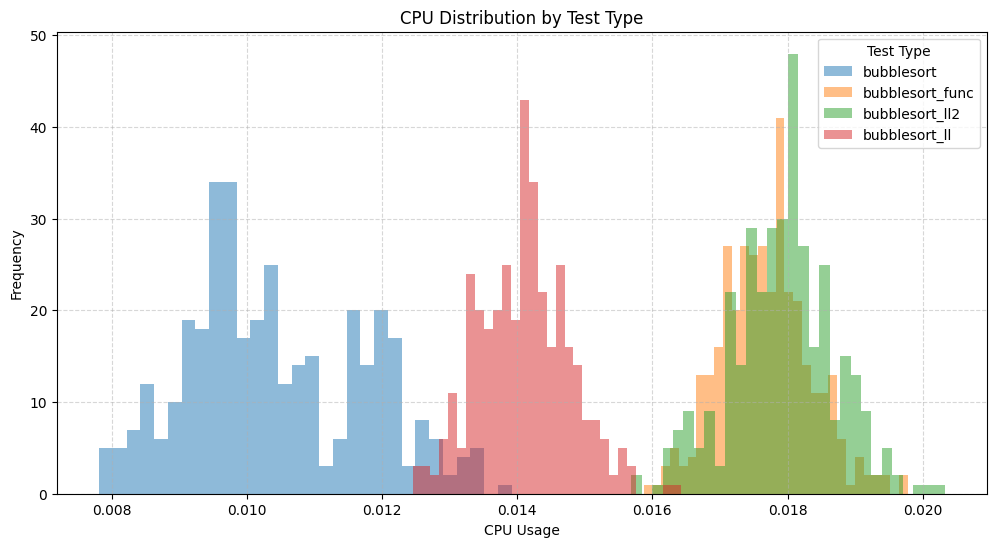

In [17]:
plt.figure(figsize=(12, 6))

# Loop through each test type and plot its CPU distribution
for test in df["test"].unique():
    plt.hist(df[df["test"] == test]["CPU"], bins=30, alpha=0.5, label=test)

# Add labels, title, and legend
plt.xlabel("CPU Usage")
plt.ylabel("Frequency")
plt.title("CPU Distribution by Test Type")
plt.legend(title="Test Type")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s)

So if we say the Null Hypothesis is that the data follows a normal distrubution, we can firstly try to plot bubblesort and bubblesort_II as a violin plot to try and visualize the distrubution further.

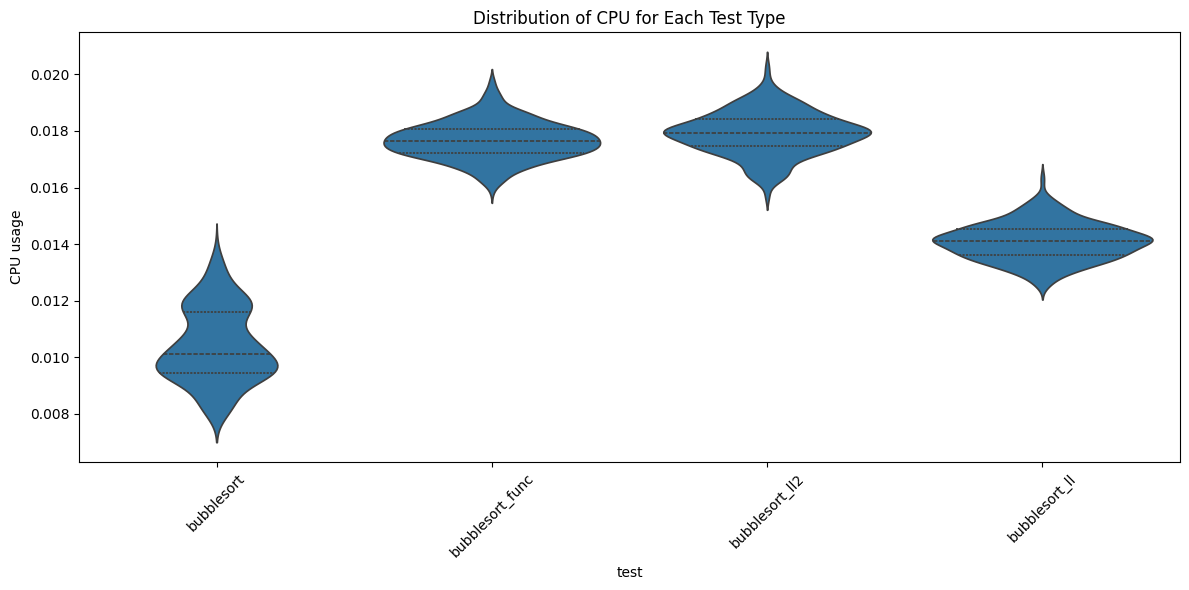

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='test', y='CPU', data=df, inner='quartile')
plt.title("Distribution of CPU for Each Test Type")
plt.ylabel("CPU usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The violin plot for bubblesort_II seems to follow a somewhat normal bellshape, having the most clusters around the center.
* The bubblesort however seems to have some inconsistency in distrubution and have 2 peaks

To confirm this assumption i will try and use the Shapiro-Wilk Test to determain wether bubblesort and bubblesort_II follows a normal distribution

In [19]:
# Lets apply the test to all tests
shapiro_groups = df['test']
# Make a for loop to apply the test to all groups
for group in shapiro_groups.unique():
    data = df[df['test'] == group]['CPU']
    stat, p = shapiro(data)
    print(f"Test: {group}, p-value: {p}")
    if p > 0.05:
        print(f"Test: {group} is normally distributed")
    else:
        print(f"Test: {group} is not normally distributed")


Test: bubblesort, p-value: 1.5722188157994535e-06
Test: bubblesort is not normally distributed
Test: bubblesort_func, p-value: 0.22397701570892709
Test: bubblesort_func is normally distributed
Test: bubblesort_ll2, p-value: 0.27395759572988476
Test: bubblesort_ll2 is normally distributed
Test: bubblesort_ll, p-value: 0.26921286581817916
Test: bubblesort_ll is normally distributed


### Conclusion

* Shapiro test makes it possilbe to compare normality accross different tests and their load on the CPU
* In combination with violin plot it makes for a effective visual representation of distribution, giving an early indication whether is normally distributed
* The Shapiro test is the performed to confirm any suspinsion from the visual inspection of the plots

Indeed the 'bubblesort' test is not normally distributed as it indicated on the two plots by having multiple peaks